In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


## 1. About the Dataset

The data contains 53940 records for training. Short descriptions of the business meaning of each column in the data is as below:
- **carat:** The carat value of the Diamond
- **cut:** The cut type of the Diamond, it determines the shine (Ideal' 'Premium' 'Good' 'Very Good' 'Fair')
- **color:** The color value of the Diamond ('E' 'I' 'J' 'H' 'F' 'G' 'D')
- **clarity:** The carat type of the Diamond ('SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1')
- **depth:** The depth value of the Diamond
- **table:** Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.
- **x:** Width of the diamond
- **y:** Length of the diamond
- **z:** Height of the diamond
- **price:** The price of the Diamond in USD.

## 2. Statement of the Problem

The goal of this project is to develop a machine learning model that accurately predicts the price of a diamond based on its characteristics. Given that diamond pricing is influenced by multiple features such as carat, cut, color, and clarity, it is essential to perform thorough exploratory data analysis (EDA) and feature engineering to enhance model performance. We will compare multiple regression models, including Decision Tree, Random Forest, XGBoost, LightGBM, and CatBoost, to determine the best
performing algorithm for predicting diamond prices.


## 3. Importing Libraries and Loading Data

In [42]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import warnings
warnings.filterwarnings('ignore')

In [43]:
# load the dataset
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


## 4. EDA

In [44]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [45]:
# Summary statistics
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [46]:
# Check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

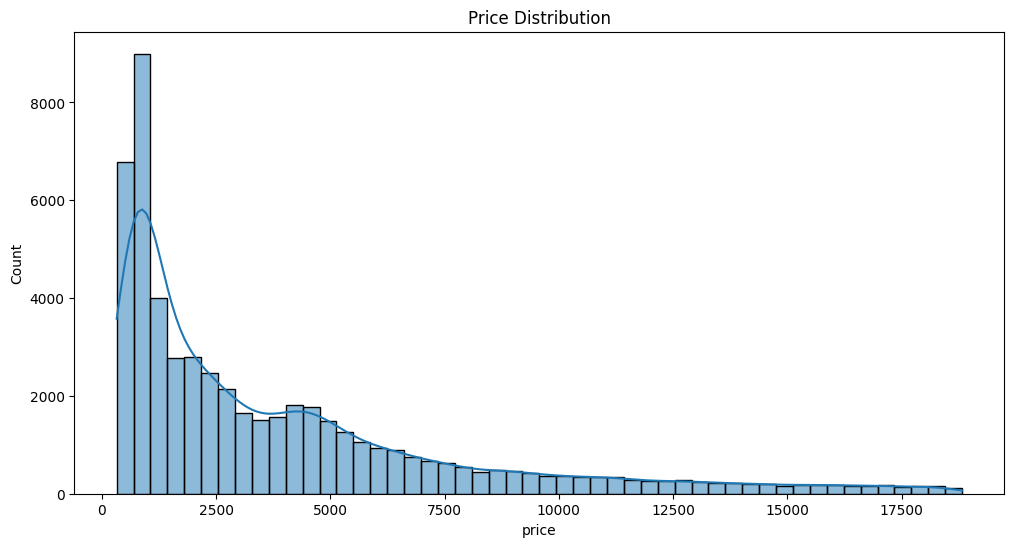

In [47]:
# Visualizing price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

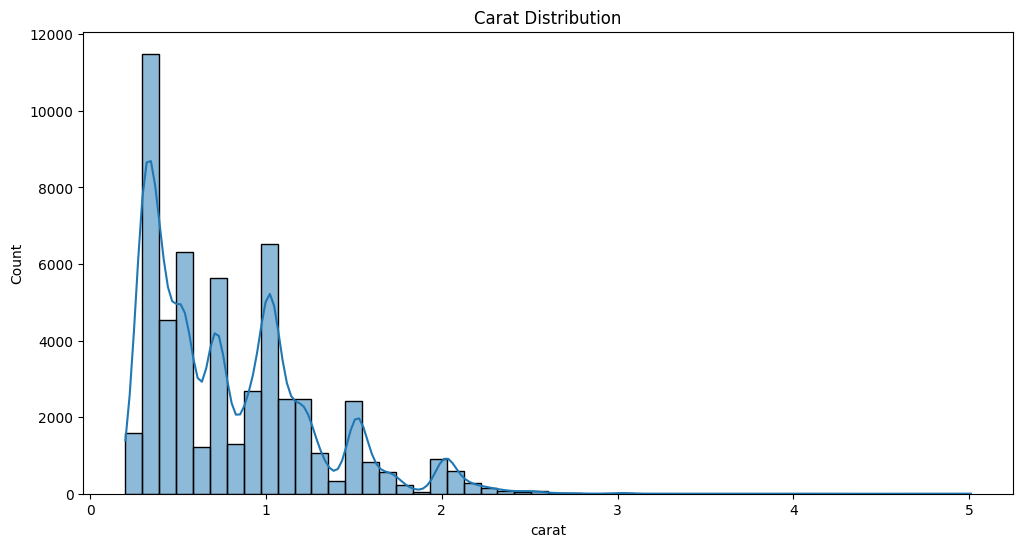

In [48]:
# Carat distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['carat'], bins=50, kde=True)
plt.title("Carat Distribution")
plt.show()

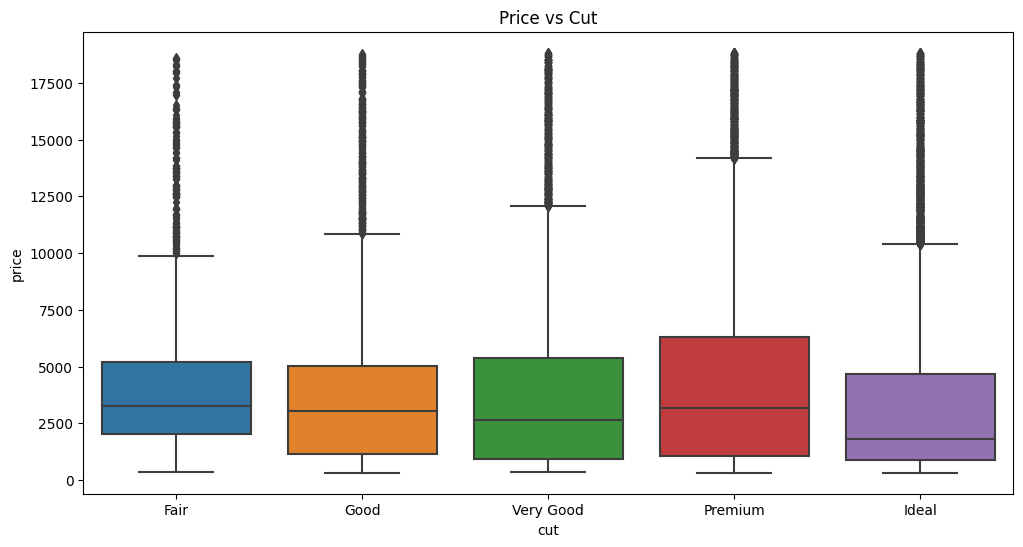

In [49]:
# Boxplot of price vs categorical features
# price vs cut
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Price vs Cut")
plt.show()

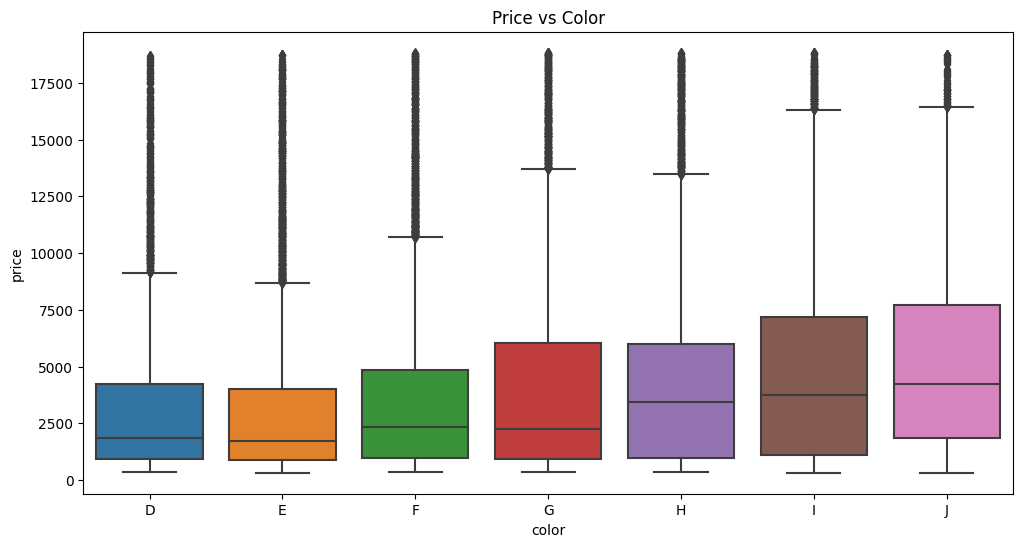

In [50]:
# price vs color
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='price', data=df, order=sorted(df['color'].unique()))
plt.title("Price vs Color")
plt.show()

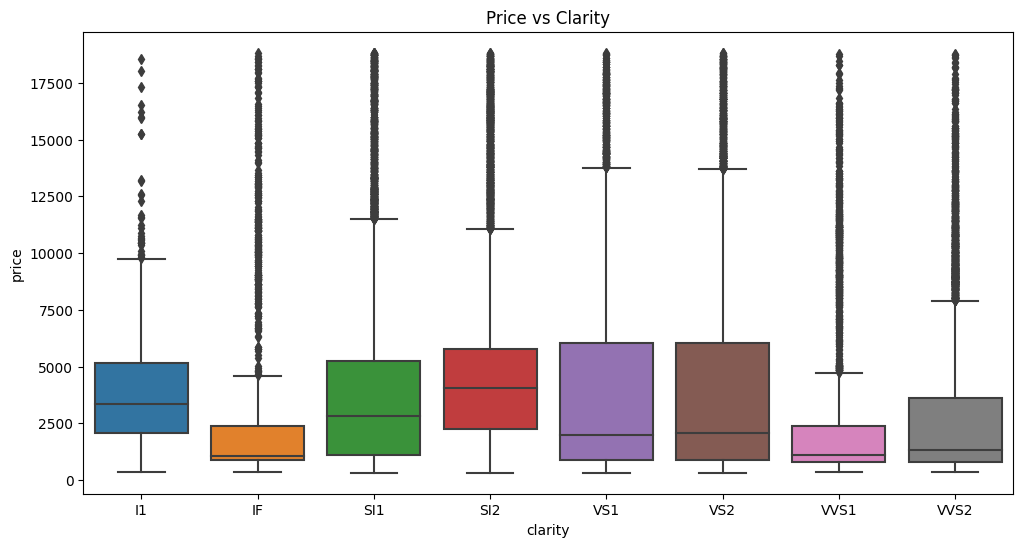

In [51]:
# price vs clarity
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, order=sorted(df['clarity'].unique()))
plt.title("Price vs Clarity")
plt.show()

In [52]:
# Encoding Categorical Variables
label_encoders = {}
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

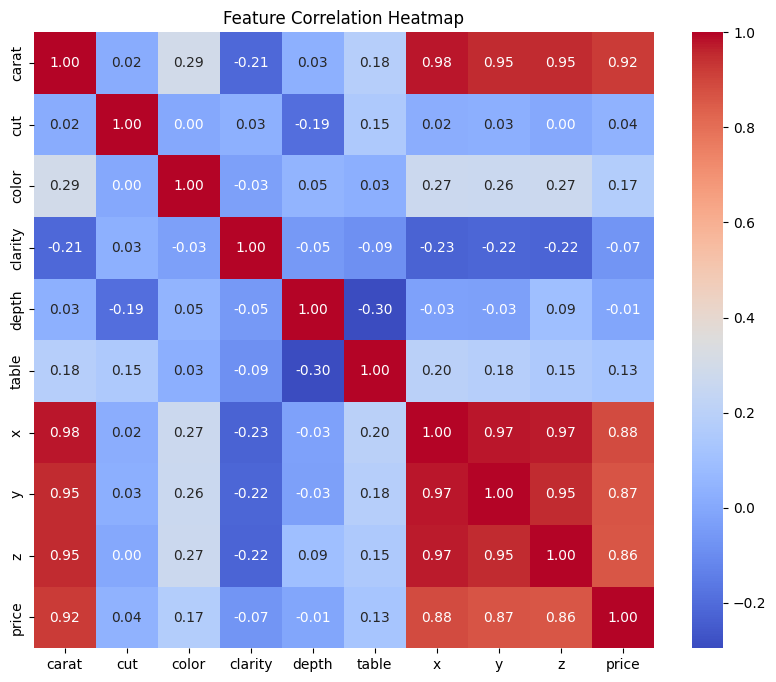

In [53]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Some notes on EDA:
- The price distribution is right-skewed, indicating that most diamonds are lower-priced, with a few high-priced outliers.
- Carat distribution is also skewed, showing that most diamonds in the dataset have a lower carat value.
- The price increases with cut quality, but not in a strictly linear manner. The 'Ideal' cut seems to have the highest median price.
- Diamonds with colors 'D' (most colorless) tend to have higher prices, confirming that color is an important factor in pricing.
- Clarity follows a similar trend, with 'IF' and 'VVS1' diamonds having higher median prices.
- The correlation heatmap shows that carat has a strong positive correlation with price, making it the most important feature. The dimensions (x, y, z) are also highly correlated, which suggests possible multicollinearity.


## 5. Feature Engineering

We have seen from EDA above, especially the price and carat distribution, that most variables are rightly skewed, and since we will be performing regression analysis, we will have to perform log transformation to normalize skewed variables. Applying log transformation reduces skewness and makes the data more normally distributed for better model performance. We will also have to standardize numerical features. Standardizing numerical features ensures that all variables are on the same scale, preventing bias toward features with larger ranges. Finally we will create new features that provide additional insights into diamond structure and how they relate to price, which could improve predictive power.

In [54]:
# Log transformation to normalize skewed variables
df['log_price'] = np.log1p(df['price'])
df['log_carat'] = np.log1p(df['carat'])
df['log_depth'] = np.log1p(df['depth'])
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,log_carat,log_depth
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326,5.789960,0.207014,4.135167
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326,5.789960,0.190620,4.107590
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327,5.793014,0.207014,4.058717
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334,5.814131,0.254642,4.149464
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335,5.817111,0.270027,4.163560


In [55]:
# Standardizing numerical features
scaler = StandardScaler()
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [56]:
# Creating New Features
df['volume'] = df['x'] * df['y'] * df['z']  # Diamond volume
df['carat_to_volume'] = df['carat'] / df['volume']  # Carat per volume
df['depth_ratio'] = df['z'] / df['y']  # Depth to length ratio
df['table_ratio'] = df['table'] / df['x']  # Table to width ratio
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,log_carat,log_depth,volume,carat_to_volume,depth_ratio,table_ratio
0,-1.198168,2,1,3,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,326,5.789960,0.207014,4.135167,-3.832344,0.312646,1.022740,0.692560
1,-1.240361,3,1,2,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,326,5.789960,0.190620,4.107590,-4.740502,0.261652,1.049676,-0.966005
2,-1.198168,1,1,4,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,327,5.793014,0.207014,4.058717,-3.803048,0.315055,1.194717,-2.252407
3,-1.071587,3,5,5,0.454133,0.242928,-1.364971,-1.317305,-1.287720,334,5.814131,0.254642,4.149464,-2.315428,0.462803,0.977541,-0.177973
4,-1.029394,1,6,3,1.082358,0.242928,-1.240167,-1.212238,-1.117674,335,5.817111,0.270027,4.163560,-1.680285,0.612631,0.921992,-0.195884


In [57]:
# Feature Selection
# Drop original price column (as we now have log_price)
df.drop(columns=['price'], inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,log_price,log_carat,log_depth,volume,carat_to_volume,depth_ratio,table_ratio
0,-1.198168,2,1,3,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,5.789960,0.207014,4.135167,-3.832344,0.312646,1.022740,0.692560
1,-1.240361,3,1,2,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,5.789960,0.190620,4.107590,-4.740502,0.261652,1.049676,-0.966005
2,-1.198168,1,1,4,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,5.793014,0.207014,4.058717,-3.803048,0.315055,1.194717,-2.252407
3,-1.071587,3,5,5,0.454133,0.242928,-1.364971,-1.317305,-1.287720,5.814131,0.254642,4.149464,-2.315428,0.462803,0.977541,-0.177973
4,-1.029394,1,6,3,1.082358,0.242928,-1.240167,-1.212238,-1.117674,5.817111,0.270027,4.163560,-1.680285,0.612631,0.921992,-0.195884


In [58]:
# Splitting Data
X = df.drop(columns=['log_price'])
y = df['log_price']

In [59]:
# Drop highly correlated features
corr_matrix = X.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

## 6. Training

In [60]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Training Models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}

## 7. Model Evaluation 

In [62]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2693
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 15
[LightGBM] [Info] Start training from score 7.789647


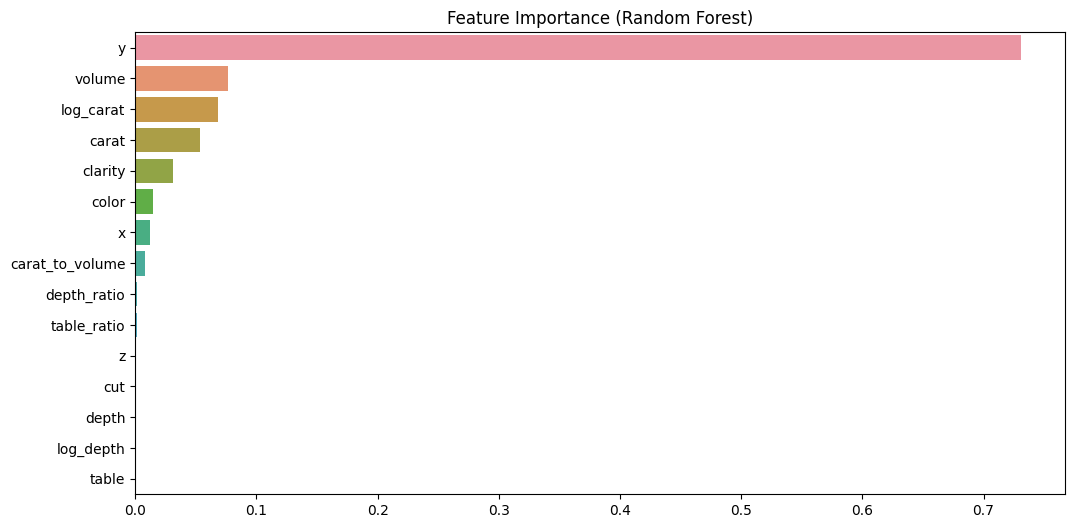

In [63]:
# Feature Importance Analysis
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

## 8. Conclusion
This project aimed to predict diamond prices using various machine learning models. We started with exploratory data analysis (EDA), visualizing the distribution of features and their relationships with price. We then performed feature engineering, including categorical encoding, feature transformations, and the creation of new features. Five machine learning models were trained and evaluated: Decision Tree, Random Forest, XGBoost, LightGBM, and CatBoost. The results demonstrated that ensemble models such as Random Forest, XGBoost, LightGBM, and CatBoost performed better than the single Decision Tree model. Feature importance analysis highlighted key predictors like carat, volume, and clarity. The final visualization compared model performances across different evaluation metrics. Overall, the insights from this analysis can help refine diamond pricing strategies in the industry.